<a href="https://colab.research.google.com/github/alexandresoto/Especializacao_PUC-RJ_trabalhosprontos/blob/main/MVP_3b_Machine_Learning_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MVP Sprint 2 - Machine Learning
## Prof. Tatiana Escovedo e Hugo Villamizar
### Aluno: Alexandre Souza Torres

## 1. Definição do Problema

O dataset usado neste projeto será o Heart-Disease-Dataset, conjunto de dados da doença cardíaca UCI Cleveland. Seu objetivo é indicar se um paciente tem ou não cardiopatia, com base em certas medidas de diagnóstico médico. Este é um problema supervisionado de classificação, em que o dataset apresenta diversos atributos relacionados a dados médicos; são 13 atributos (mais um target), sendo 1 variável de classe binária (0 ou 1), e 2 multiclasses. Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/ineubytes/heart-disease-dataset

**Informações sobre os atributos:**
1. **age** - idade em anos
2. **sex** - sexo (1 = “masculino”; 2 = “feminino”)
3. **cp** - dor toráxica (1 a 4)
4. **trestbps** - pressão arterial em repouso (em mm Hg na admissão ao hospital)
5. **chol** - colesterol sérico em mg/dl
6. **fbs** - açúcar no sangue em jejum (120 mg/dl) (1 = verdadeiro; 0 = falso)
7. **restecg** - resultados eletrocardiográficos em repouso
8. **thalach** - frequência cardíaca máxima atingida
9. **exang** - angina induzida pelo exercício (1 = “sim”; 0 = “não”)
10. **oldpeak** - depressão ST induzida pelo exercício em relação ao repouso
6. **slope** - inclinação do segmento ST do pico de exercício
7. **ca** - número de vasos principais (0-3) coloridos por fluorescência
8. **thal** - 0 = normal; 1 = defeito fixo; 2 = defeito reversível
9. **target** - indica a presença de cardiopatia em um paciente e é representado por um número inteiro que varia de 0 (indicando ausência de presença) a 4.

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Carga do Dataset

In [2]:
# Informando a URL de importação do dataset
url = "https://github.com/alexandresoto/MVP_Sprint1.1/blob/main/heart.csv?raw=True"

# Lendo o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostrando as primeiras linhas do dataset
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Feature Selection

In [3]:
# Preparação dos dados para o método de seleção de atributos. Dividindo o dataset em X (para os atributos) e
# Y (para a variável target):

# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:13] # atributos
y = array[:,13] # classe (target)

In [4]:
# Executando a seleção univariada para selecionar os atributos mais relevantes:

# Seleção de atributos com a classe SelectKBest para selecionar os atributos mais relevantes. Para isso, será
# utilizado o teste ANOVA (estima o quanto cada caracerística de X é dependente da classe Y), para selecionar
# os 4 melhores atributos:
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:13])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset.columns[0:13]))


Número original de atributos: 13

Número reduzido de atributos: 4

Atributos Originais: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

Scores dos Atributos Originais: [ 56.785  86.69  238.558  20.087  10.326   1.736  18.838 222.8   242.884
 243.451 138.679 174.877 131.803]

Atributos Selecionados: ['cp' 'thalach' 'exang' 'oldpeak']


In [5]:
# Utilizando a técnica de seleção de atributos Eliminação Recursiva de Atributos. Para isso, usaremos um algoritmo
# de regressão logística para selecionar as 4 melhores variáveis preditoras:

# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=4)
fit = rfe.fit(X, y)

# Print dos resultados
print("Atributos Originais:", dataset.columns[0:13])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=dataset.columns[0:13]))

Atributos Originais: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

Atributos Selecionados: [False  True False False False False False False  True False  True False
  True]

Ranking de atributos: [ 9  1  3  8 10  6  5  7  1  4  1  2  1]

Qtd de melhores Atributos: 4

Nomes dos Atributos Selecionados: ['sex' 'exang' 'slope' 'thal']


In [6]:
# Importância de Atributos com ExtraTrees

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:13])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).
print(modelo.feature_importances_)


Atributos Originais: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
[0.073 0.056 0.118 0.058 0.061 0.019 0.034 0.092 0.108 0.085 0.066 0.121
 0.109]


Usando a Feature Selection com ExtraTrees, encontramos 4 atributos importantes: 'cp', 'exang', 'ca', 'thal'. Faremos agora a separação em conjunto de treino e teste com holdout para verificar a acurácia. Caso seja baixa, iremos testar apenas os 4 atributos mais importantes.

## Separação em conjunto de treino e conjunto de teste com holdout

In [7]:
#Realizando a separação do dataset nas bases de treino e teste, com o método holdout.

test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:13]
y = array[:,13]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

# Modelagem e Inferência

### Criação e avaliação de modelos: linha base

LR: 0.841463 (0.036585)
KNN: 0.721951 (0.049627)
CART: 0.991463 (0.007809)
NB: 0.826829 (0.051682)
SVM: 0.697561 (0.064715)
Bagging: 0.990244 (0.011949)
RF: 0.990244 (0.011949)
ET: 0.993902 (0.011243)
Ada: 0.930488 (0.039347)
GB: 0.958537 (0.037864)
Voting: 0.900000 (0.041463)


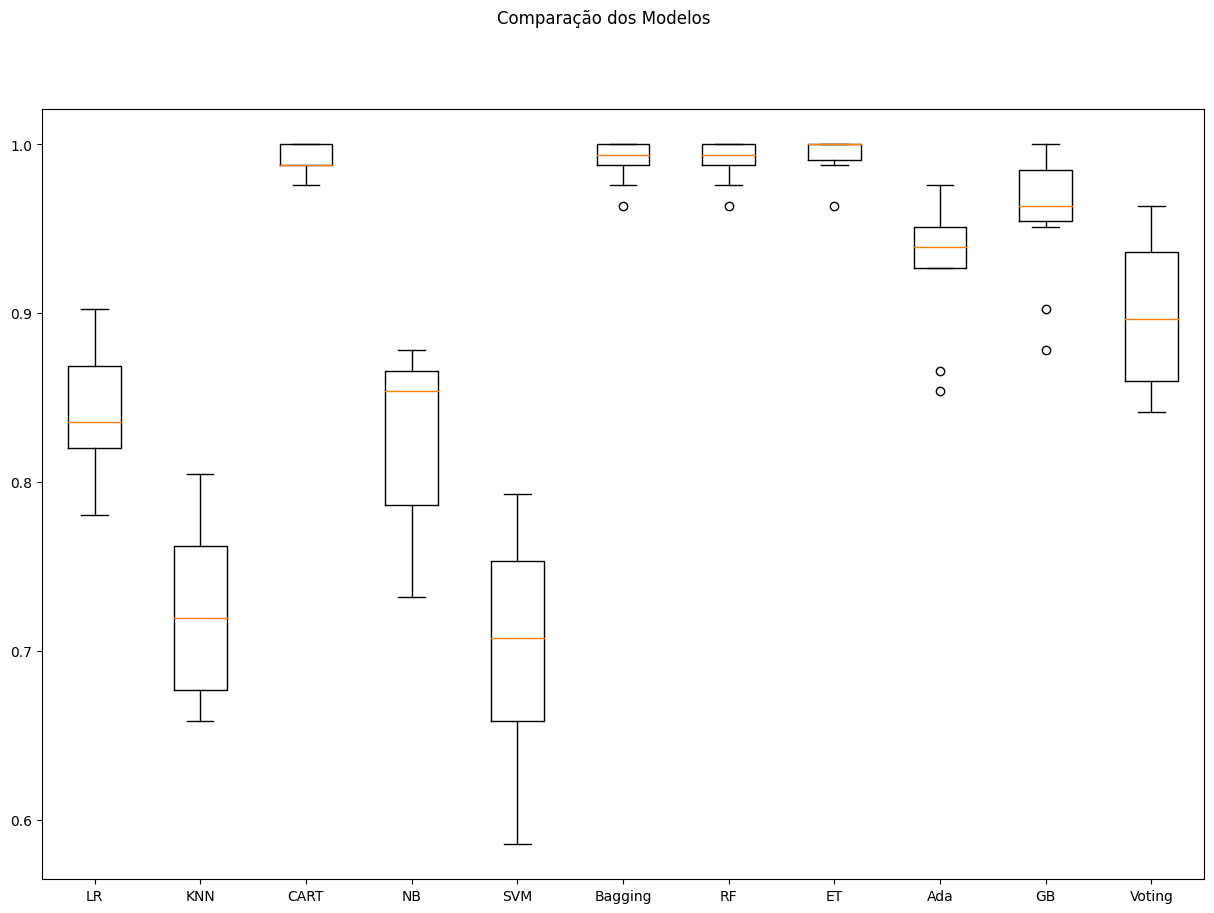

In [8]:
# Como não sabemos quais algoritmos performarão bem nesse conjunto de dados, usaremos a validação cruzada para treinar
# e avaliar os modelos usando a métrica acurácia.

np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Com base nos resultados, os modelos que apresentaram o melhor desempenho foram os algoritmos de ensemble Bagging, Random Forest e Extra Trees, bem como o Decision Tree (CART). Esses modelos alcançaram acurácias muito altas e apresentaram pouca variação entre as partições da validação cruzada. Vamos escolher o modelo Decision Tree (CART).

### Criação e avaliação de modelos: dados padronizados e normalizados

LR-orig: 0.841 (0.037)
KNN-orig: 0.722 (0.050)
CART-orig: 0.991 (0.008)
NB-orig: 0.827 (0.052)
SVM-orig: 0.698 (0.065)
Bag-orig: 0.990 (0.012)
RF-orig: 0.990 (0.012)
ET-orig: 0.994 (0.011)
Ada-orig: 0.930 (0.039)
GB-orig: 0.959 (0.038)
Vot-orig: 0.900 (0.041)
LR-padr: 0.848 (0.038)
KNN-padr: 0.844 (0.046)
CART-padr: 0.991 (0.010)
NB-padr: 0.827 (0.052)
SVM-padr: 0.917 (0.040)
Bag-padr: 0.990 (0.012)
RF-padr: 0.991 (0.012)
ET-padr: 0.991 (0.012)
Ada-padr: 0.930 (0.039)
GB-padr: 0.959 (0.038)
Vot-padr: 0.930 (0.037)
LR-norm: 0.845 (0.040)
KNN-norm: 0.848 (0.062)
CART-norm: 0.991 (0.010)
NB-norm: 0.827 (0.052)
SVM-norm: 0.898 (0.049)
Bag-norm: 0.990 (0.012)
RF-norm: 0.991 (0.012)
ET-norm: 0.994 (0.011)
Ada-norm: 0.930 (0.039)
GB-norm: 0.959 (0.038)
Vot-norm: 0.910 (0.041)


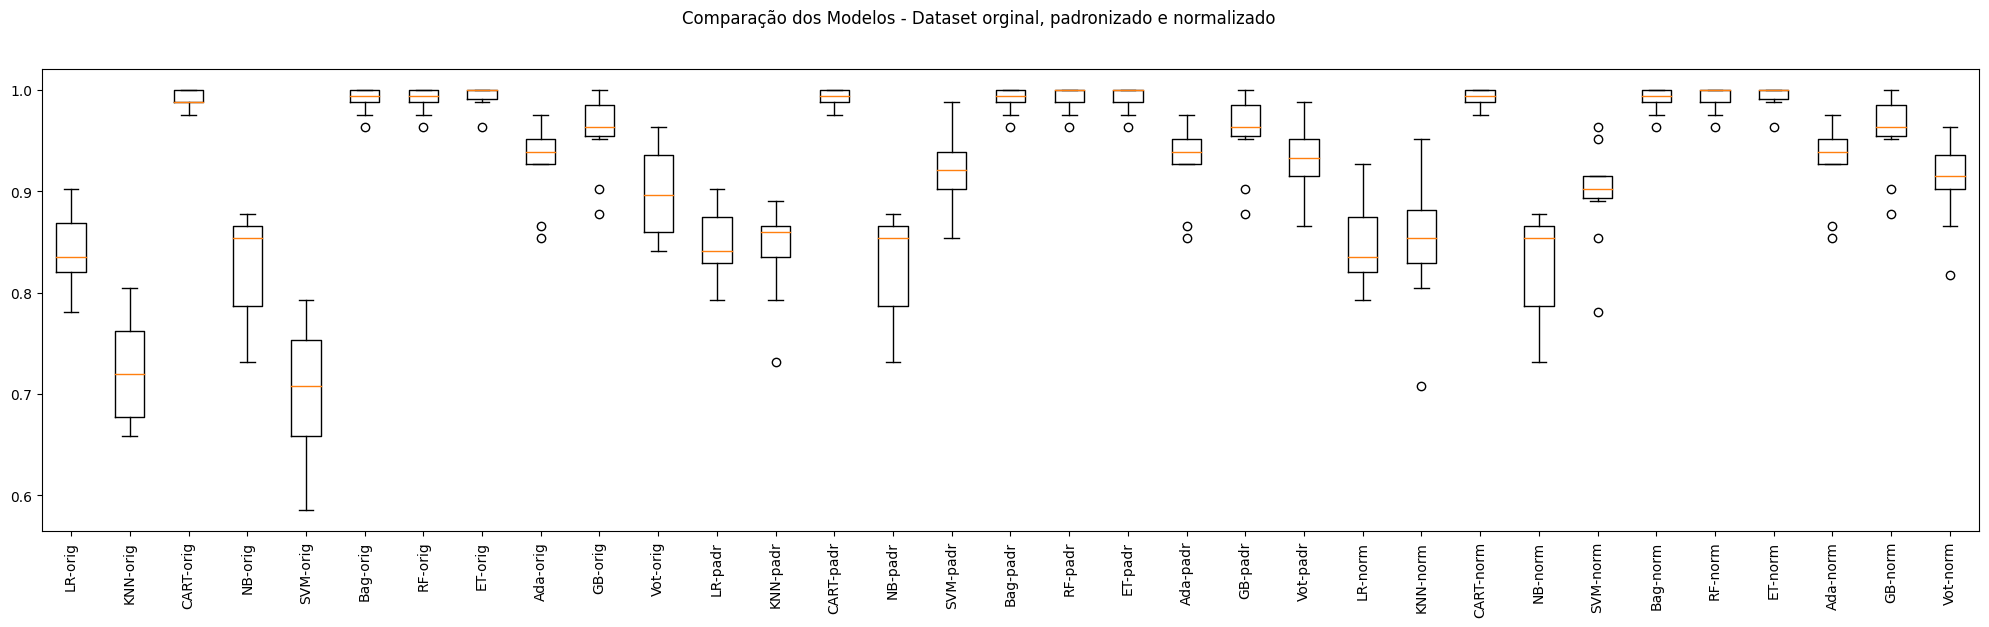

In [9]:
# Repetindo o processo, utilizando a biblioteca Pipeline para criar e avaliar os modelos através da
# validação cruzada com os dados padronizados e normalizados (evitando o data leakage) e comparar
# o seu resultado com os modelos treinados com o dataset original:

np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Novamente o modelo escolhido Decision Tree (CART) apresentou alto desempenho, com acurácia média em torno de 99% (tanto no dataset original quanto no normalizado) e um desvio padrão baixo de aproximadamente 0.8%.

### Otimização dos hiperparâmetros

In [10]:
# Utilizando a biblioteca Grid Search para executar a otimização dos hiperparâmetros do algoritmo CART

# Tuning do CART

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
cart = ('CART', DecisionTreeClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('CART-orig', Pipeline(steps=[cart])))
pipelines.append(('CART-padr', Pipeline(steps=[standard_scaler, cart])))
pipelines.append(('CART-norm', Pipeline(steps=[min_max_scaler, cart])))

param_grid = {
    'CART__criterion': ['gini']
   }

# Preparando e executando o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprimindo a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: CART-orig - Melhor: 0.991463 usando {'CART__criterion': 'gini'}
Sem tratamento de missings: CART-padr - Melhor: 0.985366 usando {'CART__criterion': 'gini'}
Sem tratamento de missings: CART-norm - Melhor: 0.990244 usando {'CART__criterion': 'gini'}


Sem tratamento de pré-processamento (dataset original), o melhor hiperparâmetro para o CART foi 'criterion': 'gini', com uma acurácia média de aproximadamente 99.15% (Melhor: 0.991463).
Com o pré-processamento utilizando padronização (StandardScaler), o melhor hiperparâmetro também foi 'criterion': 'gini', mas a acurácia média foi ligeiramente menor, em torno de 98.54% (Melhor: 0.985366).
Com o pré-processamento utilizando normalização (MinMaxScaler), novamente o melhor hiperparâmetro foi 'criterion': 'gini', e a acurácia média foi de aproximadamente 99.02% (Melhor: 0.990244).

# Finalização do Modelo

In [11]:
# Foi alcançada acurácia de 100% no conjunto de teste, sendo o resultado melhor do que o alcançado anteriormente:

# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = DecisionTreeClassifier()
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

1.0


Como o resultado foi 1,0 (100%), desconfiamos que houve overfitting. Dessa forma, iremos utilizar a Validação Cruzada para avaliar o desempenho do modelo de forma mais robusta e evitar o overfitting. A Validação Cruzada fornece uma estimativa mais confiável do desempenho do modelo em dados não vistos, permitindo que você avalie a capacidade de generalização do modelo.

In [13]:
# Padronizar os dados
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Criar o modelo de Decision Tree
model = DecisionTreeClassifier()

# Realizar a validação cruzada com 10 partições (10-fold cross-validation)
num_particoes = 10
cv_scores = cross_val_score(model, X_train_std, y_train, cv=num_particoes, scoring='accuracy')

# Imprimir os resultados da validação cruzada
print("Resultados da Validação Cruzada:")
for i, score in enumerate(cv_scores):
    print("Fold {}: {:.3f}".format(i+1, score))

# Calcular a média e o desvio padrão das acurácias da validação cruzada
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)
print("Acurácia média da Validação Cruzada: {:.3f}".format(mean_cv_score))
print("Desvio padrão da Validação Cruzada: {:.3f}".format(std_cv_score))

Resultados da Validação Cruzada:
Fold 1: 0.988
Fold 2: 0.976
Fold 3: 0.988
Fold 4: 0.963
Fold 5: 1.000
Fold 6: 0.976
Fold 7: 1.000
Fold 8: 0.988
Fold 9: 0.976
Fold 10: 1.000
Acurácia média da Validação Cruzada: 0.985
Desvio padrão da Validação Cruzada: 0.012


A acurácia média da validação cruzada foi de aproximadamente 98.5%, indicando que o modelo possui um bom desempenho médio em diferentes partições dos dados de treinamento. Além disso, o desvio padrão da validação cruzada foi relativamente baixo (0.012), o que indica que as acurácias dos diferentes folds não variaram muito, aumentando a confiabilidade da estimativa média.

In [15]:
# Preparação do modelo com todo o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com todo o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com todo o dataset
model.fit(rescaledX, y)

DecisionTreeClassifier()

In [16]:
# Imprimindo os parâmetros ajustados do modelo:
print(model.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [17]:
# Imprimindo a importância dos recursos:
if hasattr(model, 'feature_importances_'):
    print("Importância dos Recursos:")
    print(model.feature_importances_)

Importância dos Recursos:
[0.097 0.037 0.27  0.066 0.088 0.    0.019 0.045 0.022 0.093 0.027 0.155
 0.081]


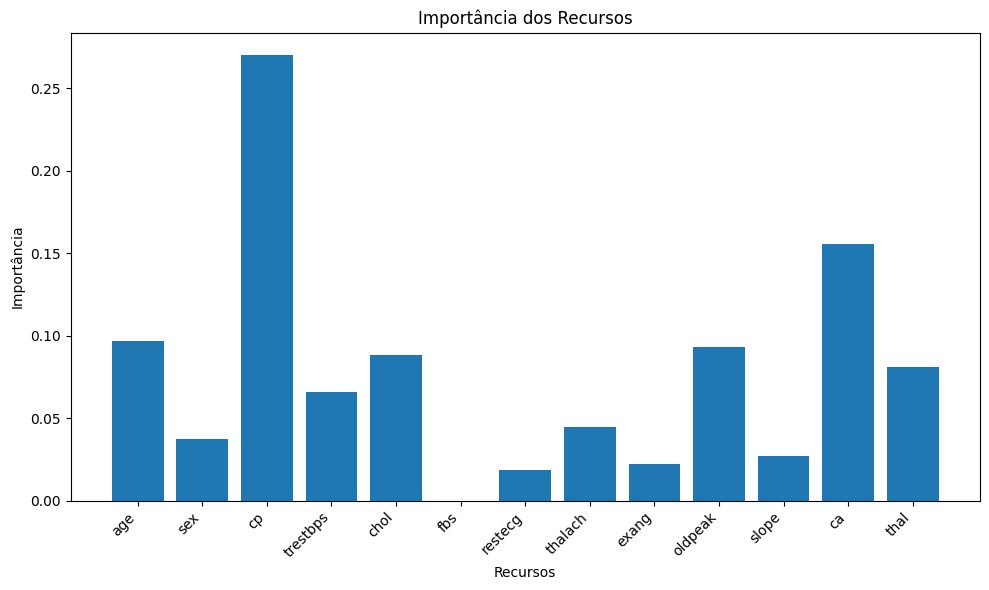

In [19]:
# Visualizando a importância dos recursos
import matplotlib.pyplot as plt

# Obter os nomes dos recursos (colunas) do conjunto de dados original
nomes_recursos = dataset.columns[:-1]

# Plotar o gráfico de barras da importância dos recursos
plt.figure(figsize=(10, 6))
plt.bar(nomes_recursos, model.feature_importances_)
plt.xlabel('Recursos')
plt.ylabel('Importância')
plt.title('Importância dos Recursos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Conclusão

O resultado foi uma acurácia de 98,5% para indicar se um paciente tem ou não cardiopatia, com base em certas medidas de diagnóstico médico.